In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# basic ML imports
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [2]:
data_url = "https://raw.githubusercontent.com/digipodium/Datasets/main/carsspeed.csv"
df = pd.read_csv(data_url,index_col=0)
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [3]:
df.shape

(50, 2)

<AxesSubplot:xlabel='speed', ylabel='dist'>

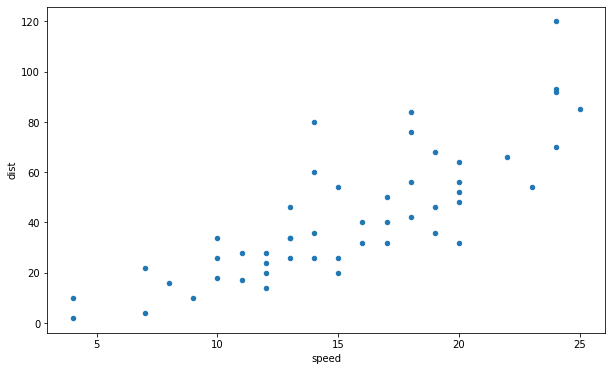

In [4]:
df.plot(x='speed',y='dist',kind='scatter',figsize=(10,6))

In [5]:
# step 2
X = df[['speed']] # 2d vector
y = df['dist']    # 1d scaler

In [6]:
# step 3
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=1)

In [7]:
# step 4
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # no parameters required
reg.fit(xtrain,ytrain) # training the algo

LinearRegression()

In [8]:
# step 5
score = reg.score(xtest,ytest) * 100
print(f'the score is {score:.2f}% for our model')

the score is 61.5910985813624% for our model


In [9]:
df['predictions']=reg.predict(X)
df.head()

,speed,dist,predictions
1,4,2,0.218970
2,4,10,0.218970
3,7,4,11.590485
4,7,22,11.590485
5,8,16,15.380990


<AxesSubplot:xlabel='speed', ylabel='dist'>

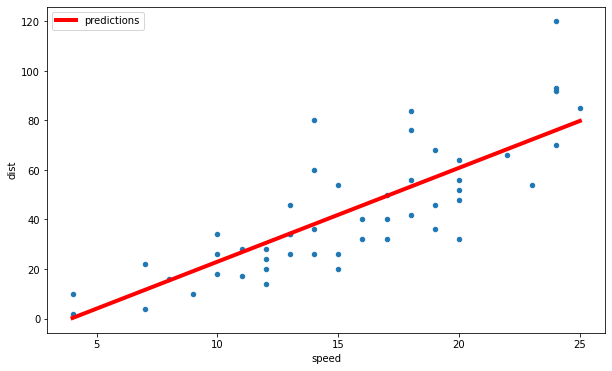

In [10]:
ax = df.plot(kind='scatter',x='speed',y='dist',figsize=(10,6))
df.plot(x='speed',y='predictions',ax=ax,color='red',linewidth=4)

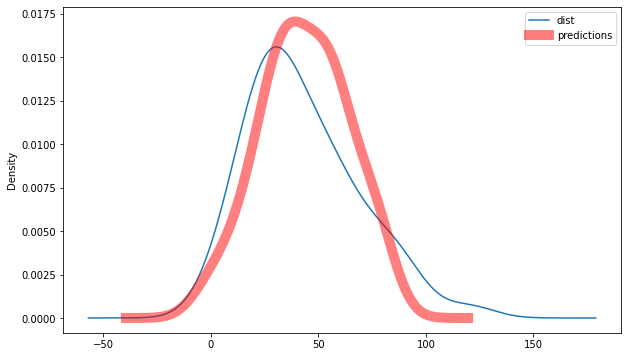

In [11]:
ax = df.plot(kind='kde',x='speed',y='dist',figsize=(10,6))
df.plot(kind='kde',x='speed',y='predictions',ax=ax,color='red',alpha=.5,linewidth=10)
plt.show()

Metrics

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [13]:
r2_score(df.dist,df.predictions)

0.6499193875395108

In [14]:
mean_absolute_error(df.dist, df.predictions)

11.579285643417004

In [15]:
mean_squared_error(df.dist, df.predictions)

227.8253209447922

model saving

In [16]:
from joblib import dump # for dumping the data to a file

In [17]:
dump(reg, "faltu_model_v1.pkl")

['faltu_model_v1.pkl']

In [21]:
del reg
del X

loading model

In [23]:
from joblib import load

In [25]:
reg = load("faltu_model_v1.pkl")

In [31]:
reg.predict([[23],[54]])

C:\Users\Admin\miniconda3\envs\env2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 72.23856533, 189.74422066])